## Loading Data and Import Libraries:

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np

## Load YOLO Model:



In [ ]:
# Load Yolo
net = cv2.dnn.readNet("/content/yolov3.txt","/content/yolov3-tiny.weights")

In [ ]:
with open("/content/coco.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
# Loading image
img = cv2.imread("/content/img.jfif")
img = cv2.resize(img, None, fx=0.7, fy=0.7)

height, width, channels = img.shape

## Processing Detections:


In [ ]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

## Draw Bounding Boxes:

()

 Total number of objects detected: 0


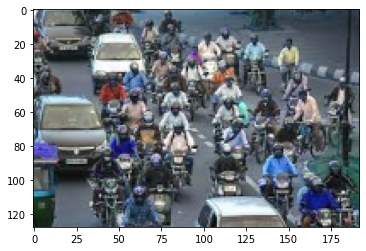

In [ ]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

index_coco=[0,1,2,3,4,5,6,7,10,12]
font = cv2.FONT_HERSHEY_PLAIN

num_of_obj=0;

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        if(class_ids[i]>=0 and class_ids[i]<=12 and class_ids!=8):
          label = str(classes[class_ids[i]])
          print(classes[class_ids[i]]," ",class_ids[i],"\n")
          color = colors[class_ids[i]]
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 6)
          print("x",str(x)," y ",str(y)," x+w ",str(x+w)," y+h ",str(y+h))
          num_of_obj+=1;

print("\n Total number of objects detected:",num_of_obj)
from matplotlib import pyplot as plt
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### This code snippet loads and processes an image using the YOLOv3-tiny model to detect objects. It involves loading the model and class names, preparing the image, running the YOLO model to get detections, filtering and drawing bounding boxes on the detected objects, and displaying the results using Matplotlib.


